In [1]:

!pip install -U statsmodels
!pip install colorama

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit

from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

In [3]:
apple = pd.read_csv('AAPL.csv')
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [5]:
apple.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [6]:
# summary
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [8]:
apple.shape

(2011, 7)

# EDA :Data Preprocessing

In [9]:
apple=apple.round(decimals=4, out=None)

In [10]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.4857,58.9286,58.4286,58.7471,50.7657,75555200
1,2012-01-04,58.5714,59.2400,58.4686,59.0629,51.0385,65005500
2,2012-01-05,59.2786,59.7929,58.9529,59.7186,51.6052,67817400
3,2012-01-06,59.9671,60.3929,59.8886,60.3429,52.1446,79573200
4,2012-01-09,60.7857,61.1071,60.1929,60.2471,52.0619,98506100


In [11]:
from datetime import datetime

In [12]:
apple['Date']

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object

In [13]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [14]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [15]:
apple.shape

(2011, 7)

In [16]:
apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
# date as index
apple.set_index('Date',inplace=True)
apple['date']=apple.index

In [18]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2012-01-03,58.4857,58.9286,58.4286,58.7471,50.7657,75555200,2012-01-03
2012-01-04,58.5714,59.2400,58.4686,59.0629,51.0385,65005500,2012-01-04
2012-01-05,59.2786,59.7929,58.9529,59.7186,51.6052,67817400,2012-01-05
2012-01-06,59.9671,60.3929,59.8886,60.3429,52.1446,79573200,2012-01-06
2012-01-09,60.7857,61.1071,60.1929,60.2471,52.0619,98506100,2012-01-09


In [19]:
apple.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
date         0
dtype: int64

In [20]:
apple[apple.duplicated()]

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,


 No duplicate value in given dataset

In [21]:
apple.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


# visualization data

<AxesSubplot:>

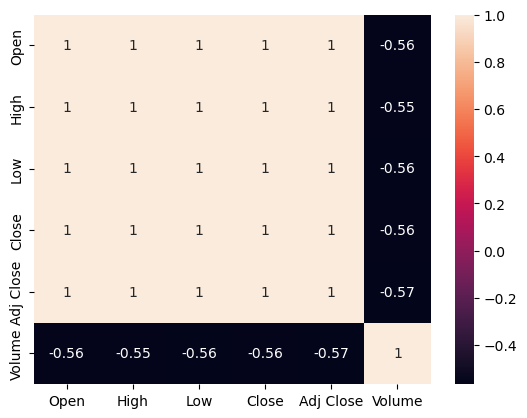

In [22]:
sns.heatmap(apple.corr(),annot=True)

 we can say there is a strong correlation between five columns.
we can choose any one column from this for prediction

In [23]:
# feature selection
apple_feature_selected = apple.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

In [24]:
col_order = ['Date','Adj Close']

In [25]:
apple_feature_selected = apple_feature_selected.reindex(columns=col_order)
apple_feature_selected

,Date,Adj Close
Date,,
2012-01-03,NaN,50.7657
2012-01-04,NaN,51.0385
2012-01-05,NaN,51.6052
2012-01-06,NaN,52.1446
2012-01-09,NaN,52.0619
...,...,...
2019-12-23,NaN,282.0541
2019-12-24,NaN,282.3223
2019-12-26,NaN,287.9236


In [26]:
monthly_mean = apple_feature_selected['Adj Close'].resample('M').mean()

In [27]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2012-01-31,52.907300
2012-02-29,61.424385
2012-03-31,71.292441
2012-04-30,74.810135
2012-05-31,69.708041
...,...
2019-08-31,202.738814
2019-09-30,215.853320
2019-10-31,232.974970


In [28]:
# Matplotlib parameters
from pylab import rcParams
import matplotlib.ticker as ticker
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
plt.style.context('fivethirtyeight')

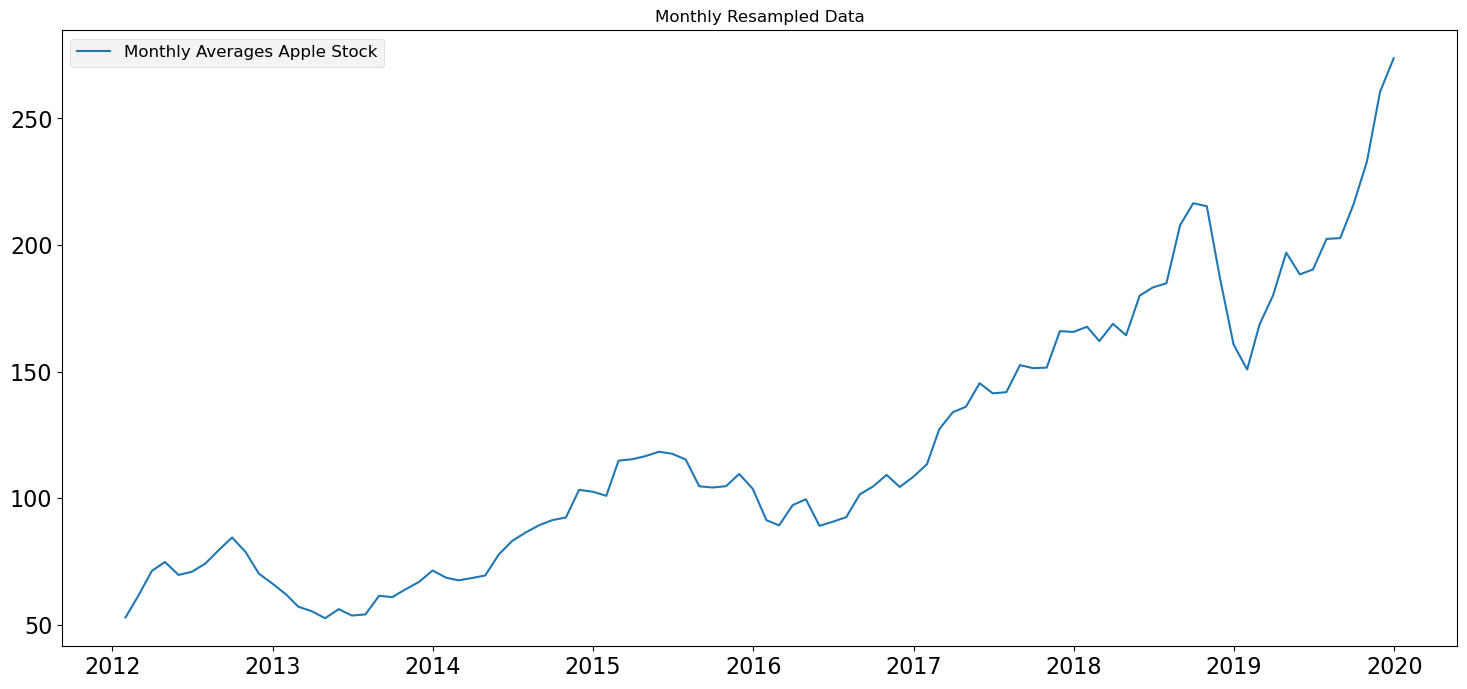

In [29]:
# monthly stock price
fig=plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size':12})
plt.show()


# Exploratory Data Analysis

In [30]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,52.907300,2012,January,Tuesday,1
2012-02-29,61.424385,2012,February,Wednesday,1
2012-03-31,71.292441,2012,March,Saturday,1
2012-04-30,74.810135,2012,April,Monday,2
2012-05-31,69.708041,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,202.738814,2019,August,Saturday,3
2019-09-30,215.853320,2019,September,Monday,3
2019-10-31,232.974970,2019,October,Thursday,4


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

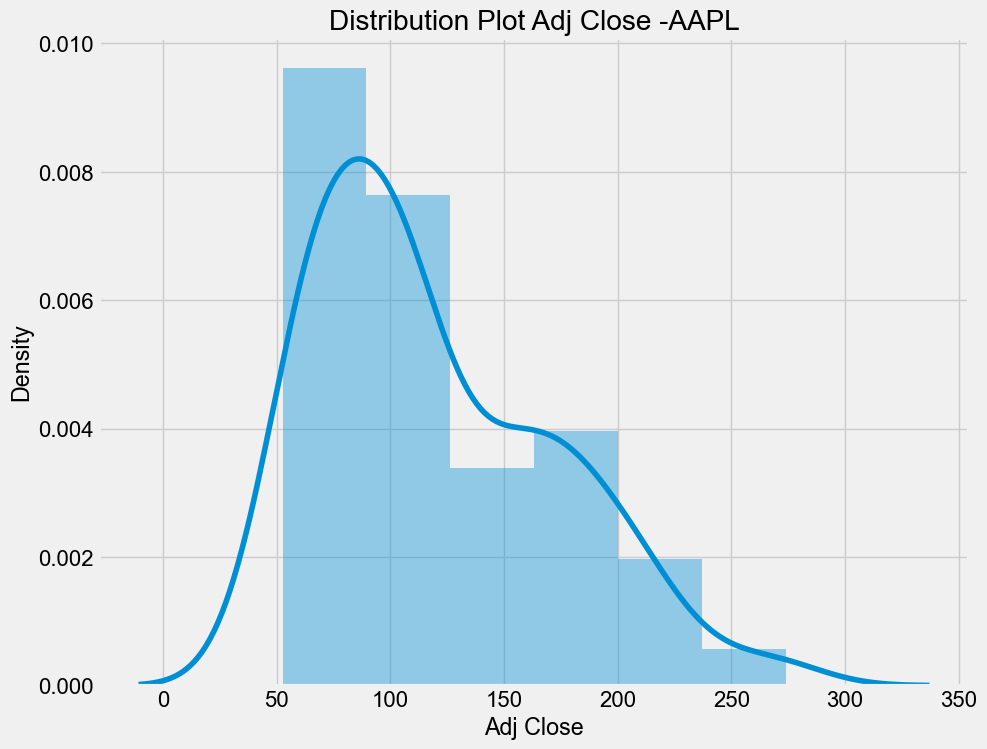

In [31]:
## Distribution of Our Data
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")

sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Inference: Distribution shows Right skew

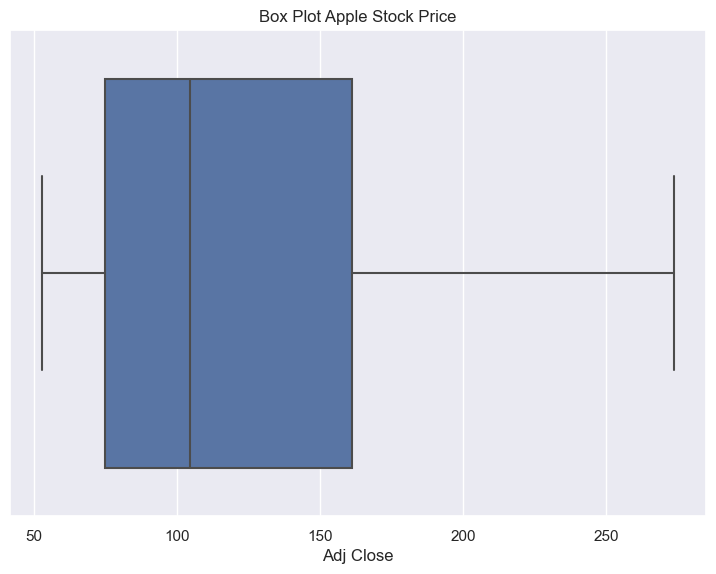

In [32]:

fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')


Box-Plot Inference :-

->Distribution shows Right Skew

->Outlier towards the higher end around Stock price 



Text(0.5, 1.0, 'QQ plot Apple Stock Price')

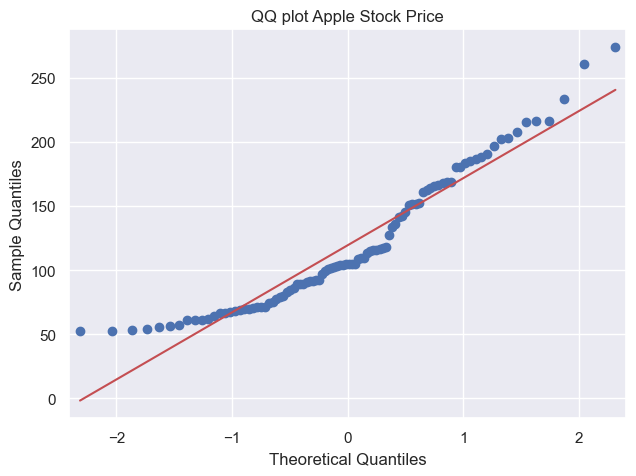

In [33]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ plot Apple Stock Price')

QQ plot Inference :-

->Heavy Tailed Distribution-Curve at Extremities

-> Shows extent of both right and left skews

->Shows Distribution is Not following  Normal Distribution



In [34]:
print('Skewness',monthly_data['Adj Close'].skew())
print('Kurtosis',monthly_data['Adj Close'].kurtosis())

Skewness 0.8054132022067184
Kurtosis -0.11205053844801727


Right tailed skewness

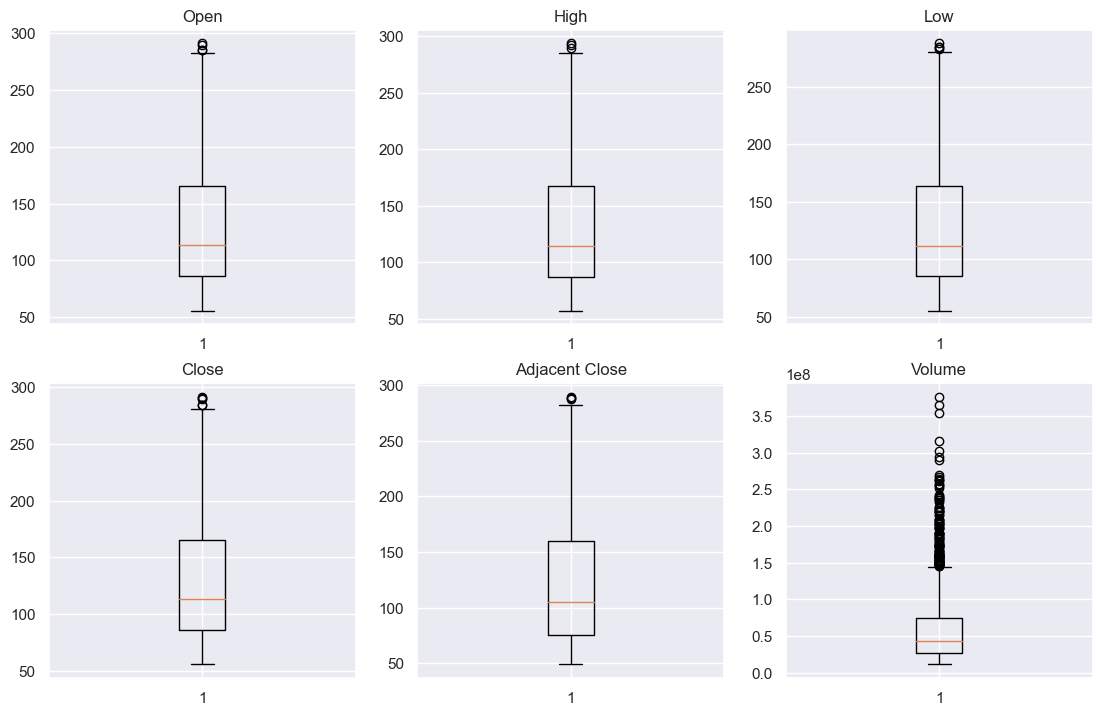

In [35]:
fig, ax = plt.subplots(2,3, figsize = (12,8))
ax[0,0].boxplot(apple.Open);ax[0,0].set_title("Open")
ax[0,1].boxplot(apple.High);ax[0,1].set_title("High")
ax[0,2].boxplot(apple.Low);ax[0,2].set_title("Low")
ax[1,0].boxplot(apple.Close);ax[1,0].set_title("Close")
ax[1,1].boxplot(apple["Adj Close"]);ax[1,1].set_title("Adjacent Close")
ax[1,2].boxplot(apple.Volume);ax[1,2].set_title("Volume")
plt.show()

As we Observe that there are minimum number of Outliers in every columns so we can neglect those outlier.
There are High no. of Outliers in 'Volume' column

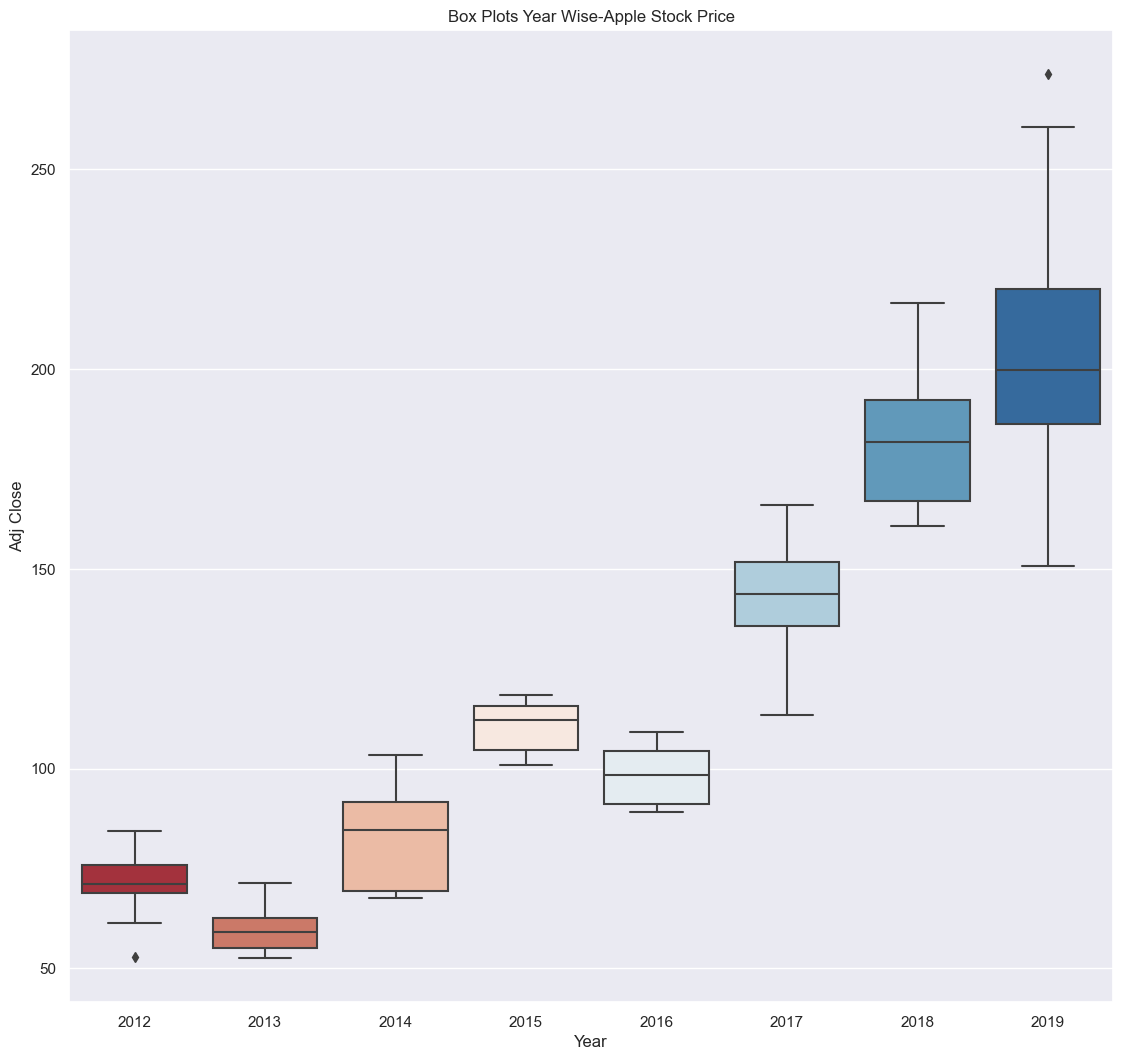

In [36]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')
     

Inferences Box Plot

->Outliers Present in Year 2012 and 2019

->Lot of Variability in Years 2014, 2017-19

->2019 most volatile year among all years

->Upward Rising Trend is shown

In [37]:
group_by_yr =[]
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
    group_by_yr.append('apple' + str(yr))
    
for enum, yr in enumerate(list_years):
    group_by_yr[enum] = monthly_data[str(yr)]['Adj Close']
    dict_IQR[str(yr)] = stats.iqr(group_by_yr[enum])

In [38]:
#IQR yearwise for stock price
dict_IQR

{'2012': 6.933138841991337,
 '2013': 7.476561501976285,
 '2014': 22.34297686335404,
 '2015': 11.107398268398256,
 '2016': 13.3105781527683,
 '2017': 16.224543267630537,
 '2018': 25.262026242236033,
 '2019': 33.783981471390916}

Text(0, 0.5, 'IQR')

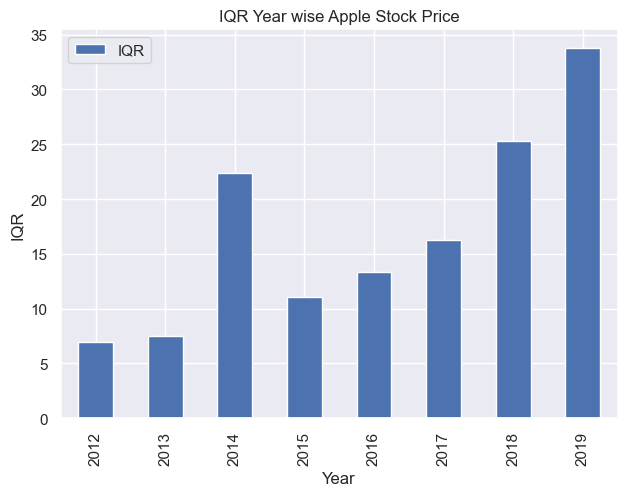

In [39]:
IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')

plt.style.context('fivethirtyeight')
plt.title('IQR Year wise Apple Stock Price')
plt.ylabel('IQR')

When Data is Not Normal Inter-Quartile Range(IQR) is Better Variability Metric than Standard Deviation as IQR is not affected by outliers.

As observed with BoxPlot 2014 and 2019 are the most volatile Years for Apple Stock

# Year wise data distribution

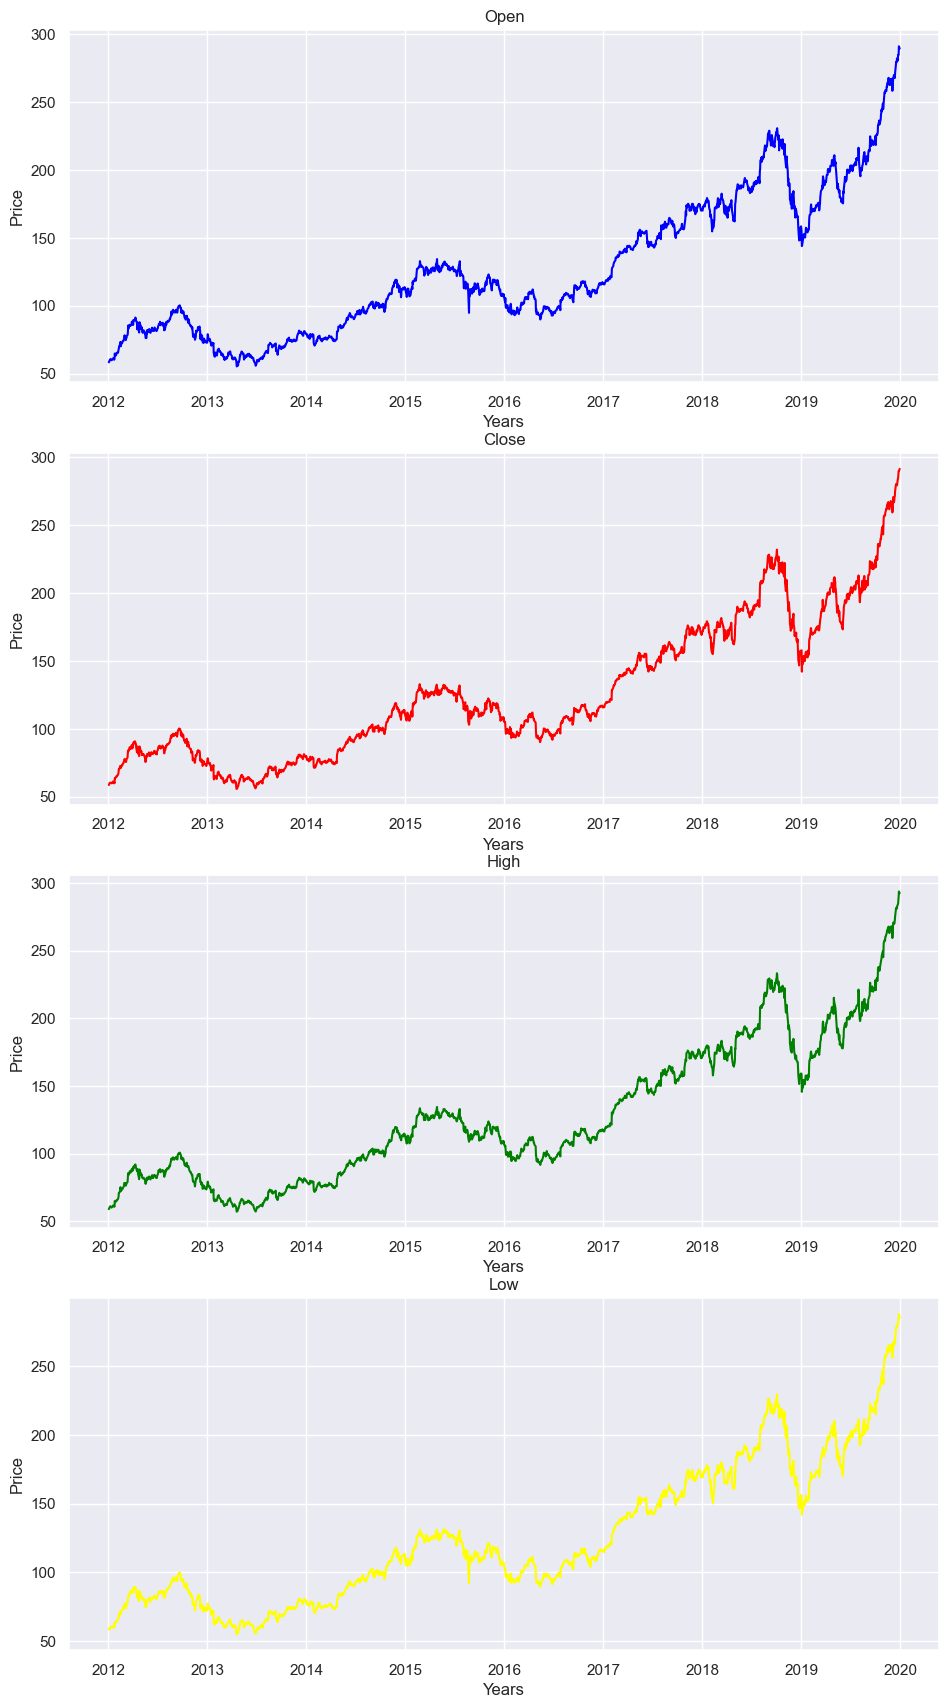

In [40]:
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.plot(apple.index, apple['Open'], color = 'blue');plt.title("Open");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,2)
plt.plot(apple.index, apple['Close'], color = 'red');plt.title("Close");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,3)
plt.plot(apple.index, apple['High'], color = 'green');plt.title("High");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,4)
plt.plot(apple.index, apple['Low'], color = 'yellow');plt.title("Low");plt.xlabel("Years"); plt.ylabel('Price')
plt.show()

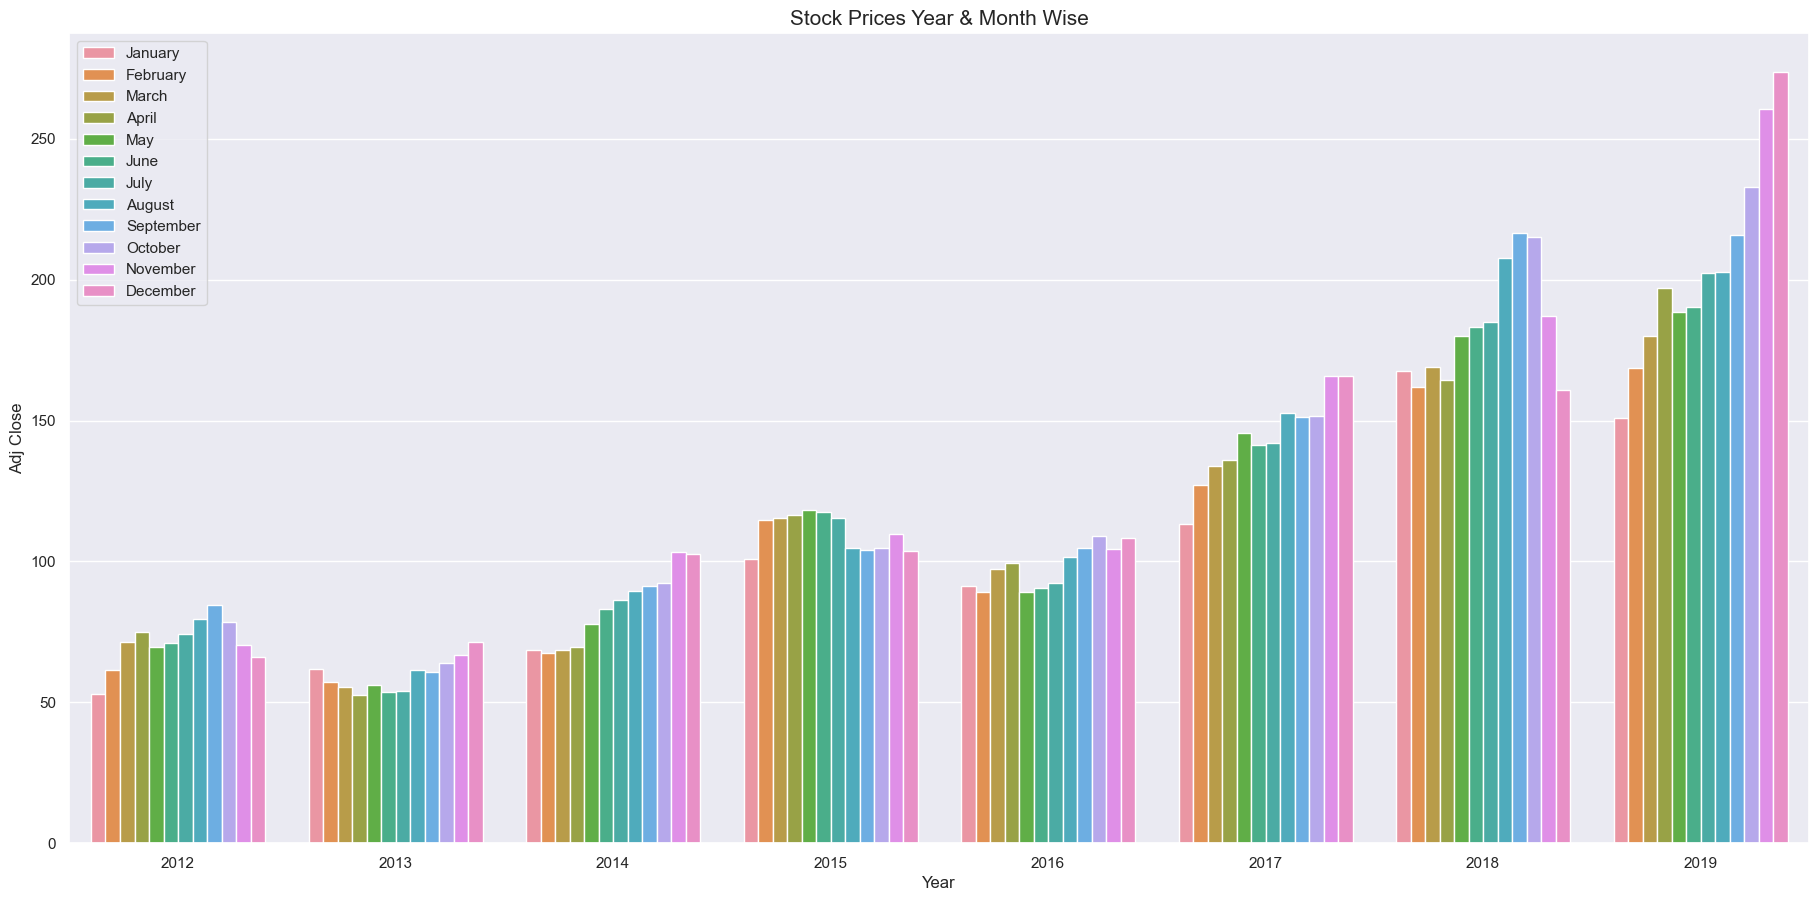

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r",4)
a = sns.barplot(x="Year",y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time,the Wallstreet is excited about upcoming products .

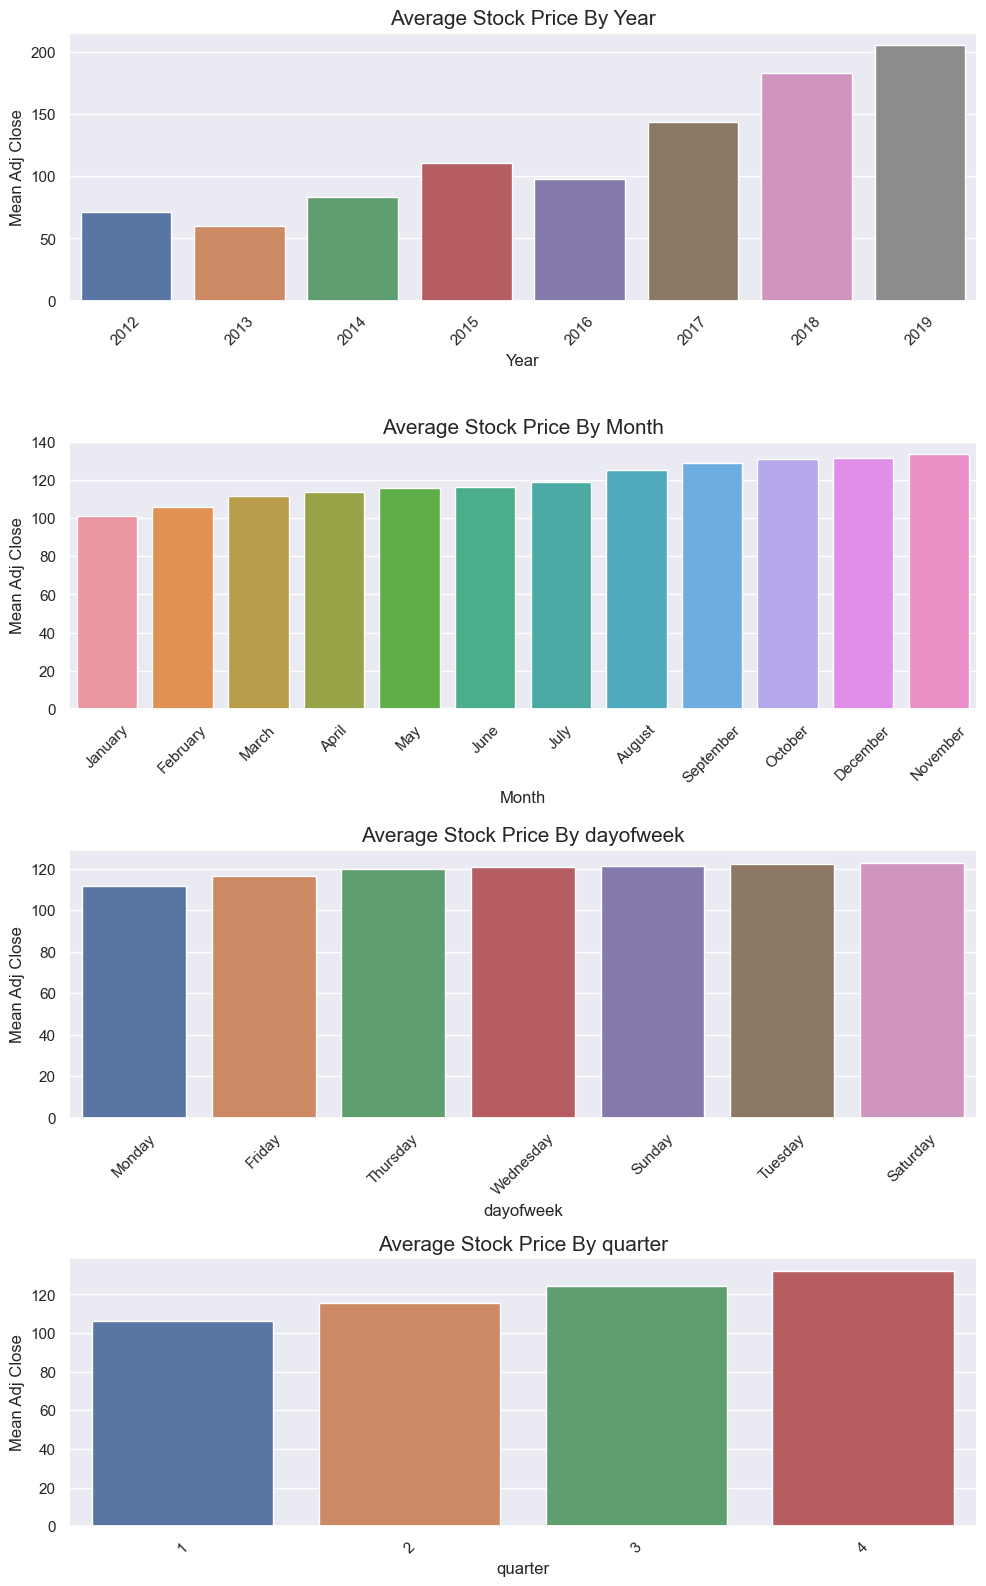

In [42]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)
     


*According to Mean price by Years, 2013 and 2016 are the only years where Mean price is lower than previous Year.

*Average Stock Price is lower at start of the week in comparision to the end of the week.

*The Average Price is Highest in the Month of November.

*Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.

# Model Building

# Decomposition of Time Series

<Figure size 2000x1600 with 0 Axes>

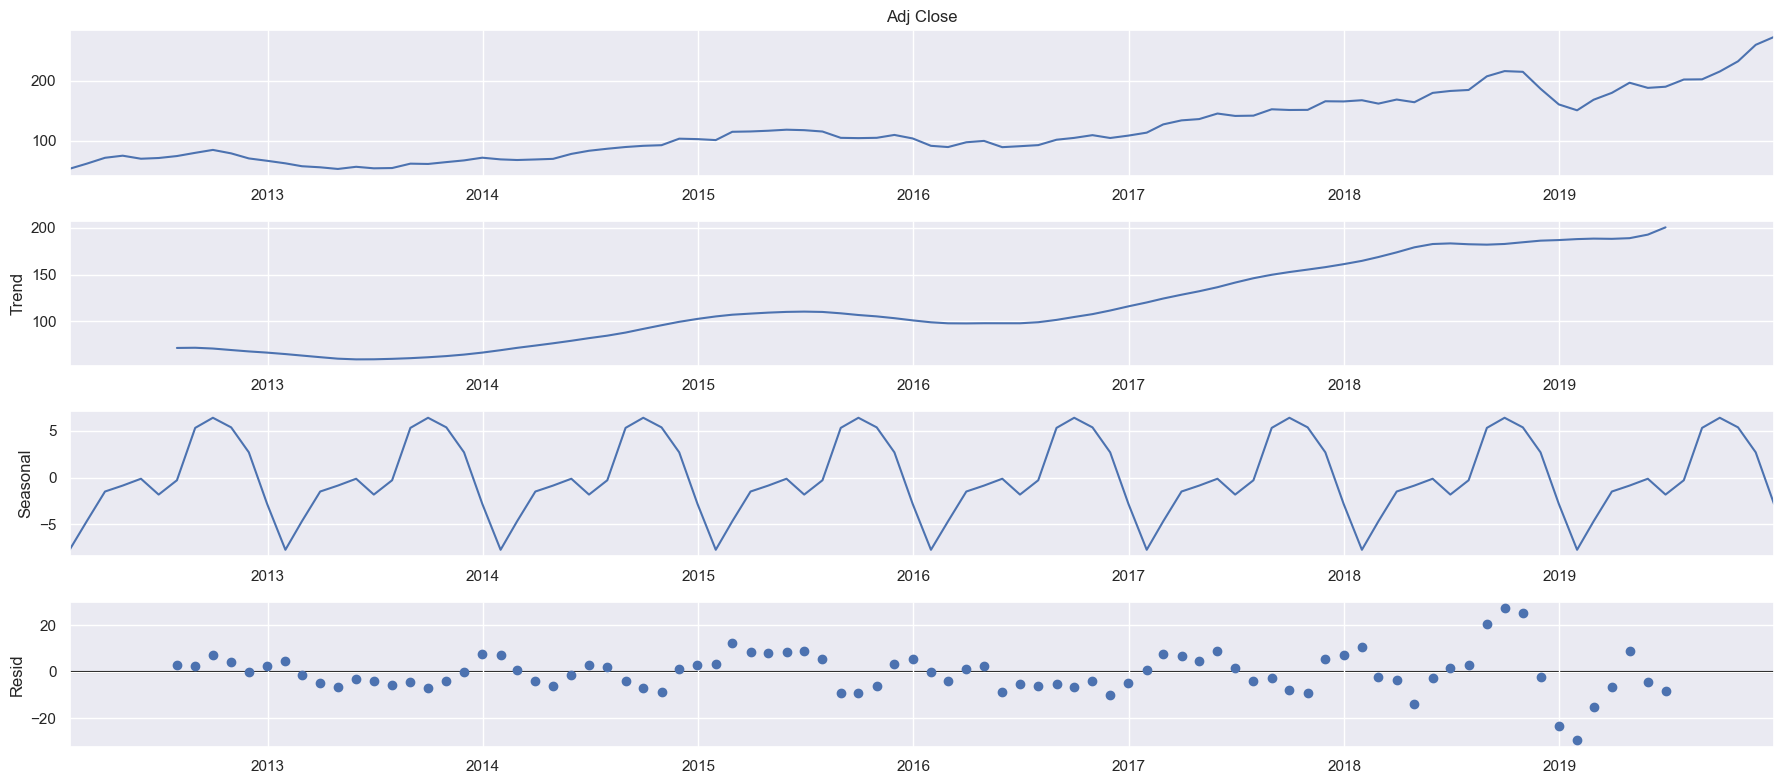

In [43]:
rcParams['figure.figsize']=18,8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive')
decomposed_series.plot()
plt.show()

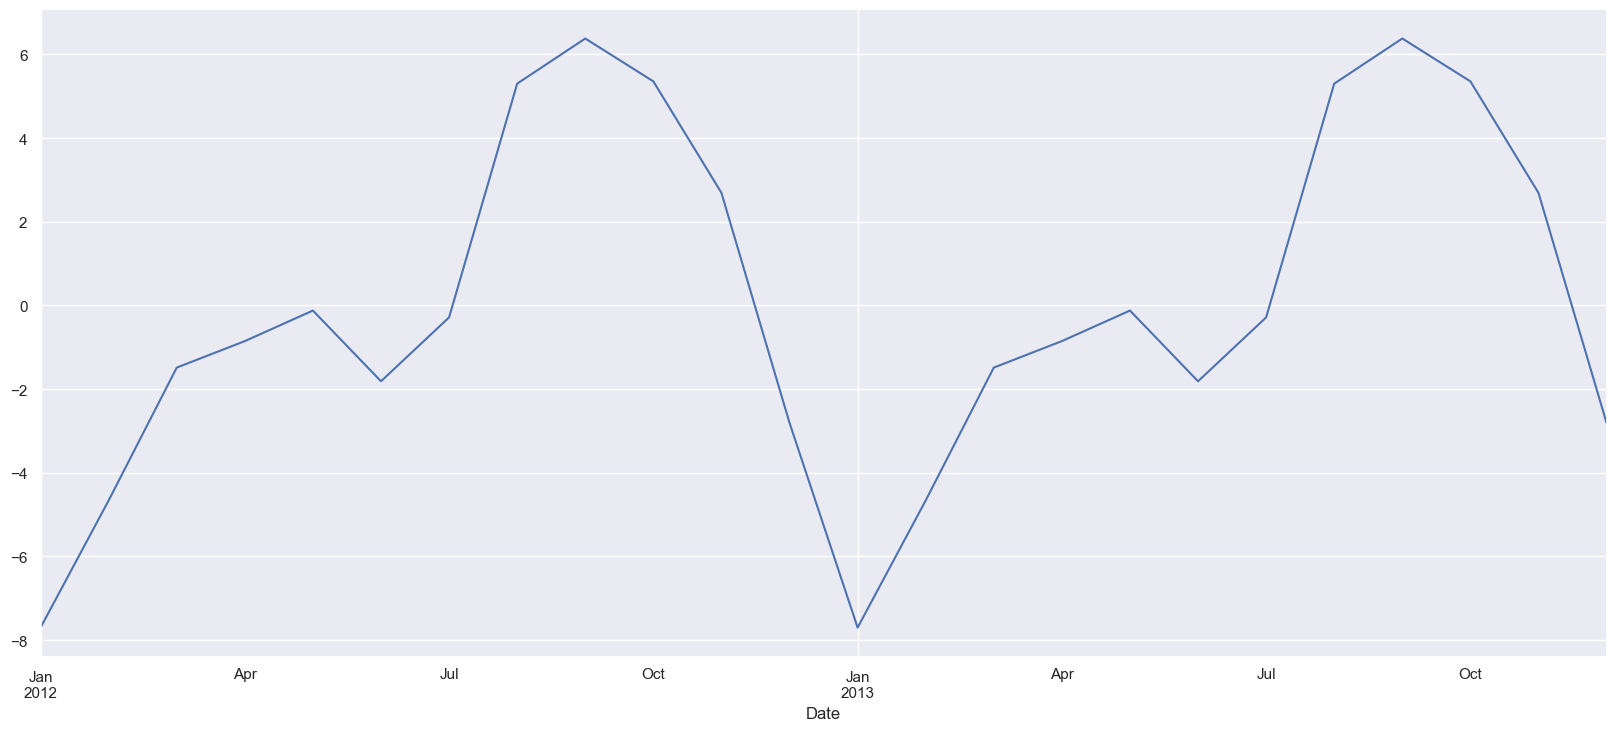

<Figure size 800x800 with 0 Axes>

In [44]:
#Drilling down and observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

Inference by decomposition

Trend : Overall an Upward Trend

Seasonality :There appears to be seasonality,AAPLE has rallied during the last 3 Months of every year. Oct to Dec period has good sales for Apple Over the Years.
You can see the uniform seasonal change.
Non-uniform noise that represent outliers and missing values

We can quite clearly see that the data has all 3, Levels, Trends, Seasonality.

# Stationarity of Time Series

Plotting Rolling Statistics

We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.

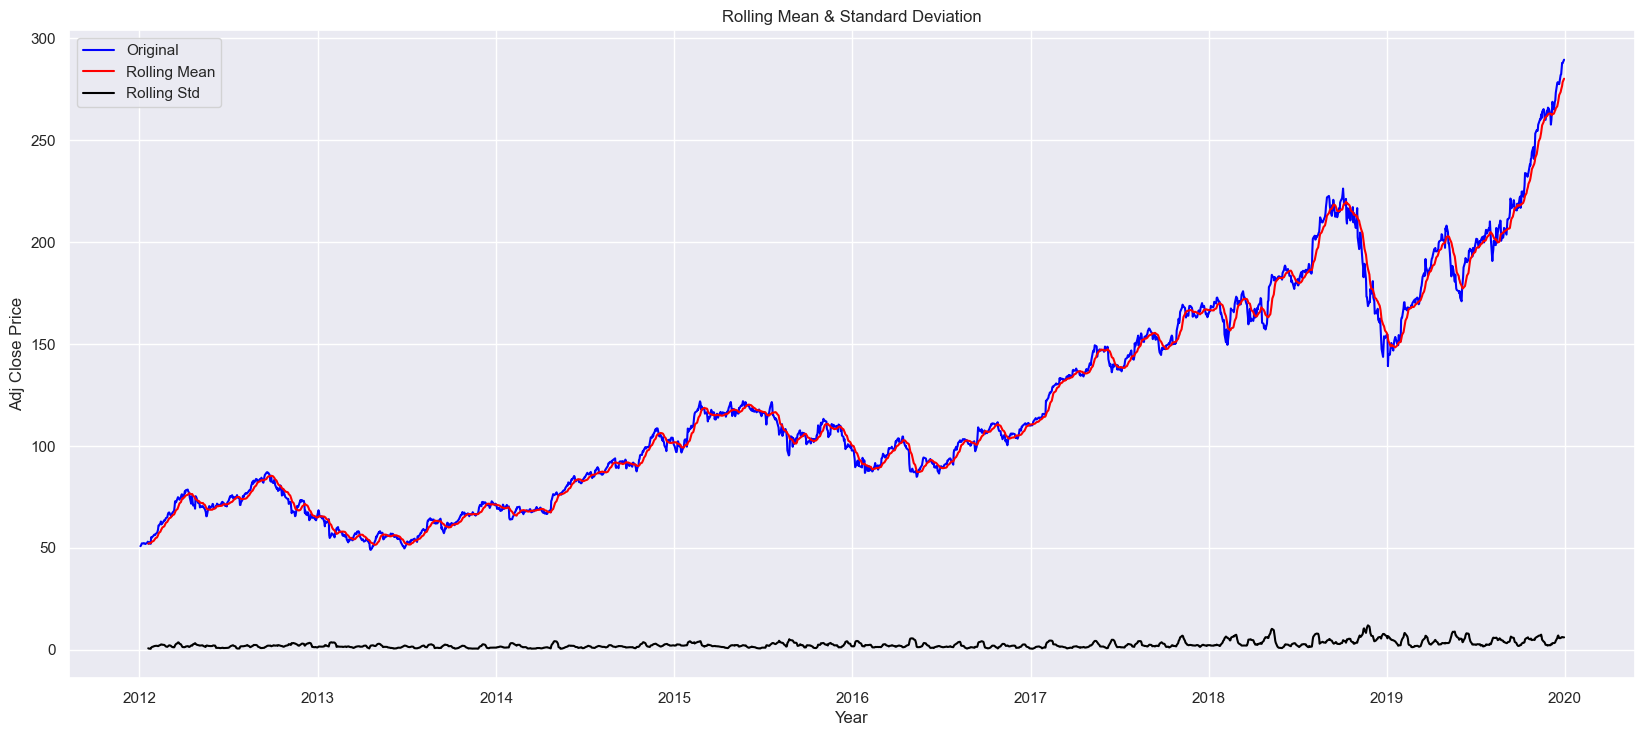

In [45]:
rolmean = apple['Adj Close'].rolling(12).mean()
rolstd = apple['Adj Close'].rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(apple['Adj Close'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.xlabel("Year")
plt.ylabel('Adj Close Price')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

+ We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
+ The time series is hence not stationary

Stationarity Test of Time Series

Using Augmented Dickey-Fuller(ADF) Test

Null Hypothesis : Time series has a unit root -It is non-stationary

Alternate Hypothesis : Time series does not have a unit root -It is stationary

Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.

In [46]:
## ADF Test-Statsmodel Library

def ad_fuller_func(x):
    result_ad_fuller = adfuller(x)
    print('ADF Statistic: %f' % result_ad_fuller[0])
    print('p-value:%f'% result_ad_fuller[1])
    print('Critical Values:')
    for key, value in result_ad_fuller[4].items():
        print('\t%s: %.3f' % (key,value))
        
        if result_ad_fuller[0]< result_ad_fuller[4]['5%']:
            print('Reject Null Hypothesos(Ho)-Time Series is Stationary')
        else:
            print('Failed to Reject Ho-Time Series is Non-Stationary')

In [47]:
ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.339253
p-value:0.996820
Critical Values:
	1%: -3.504
Failed to Reject Ho-Time Series is Non-Stationary
	5%: -2.894
Failed to Reject Ho-Time Series is Non-Stationary
	10%: -2.584
Failed to Reject Ho-Time Series is Non-Stationary


Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)

Statistically verified by ADF Test

# Detrend

In [48]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

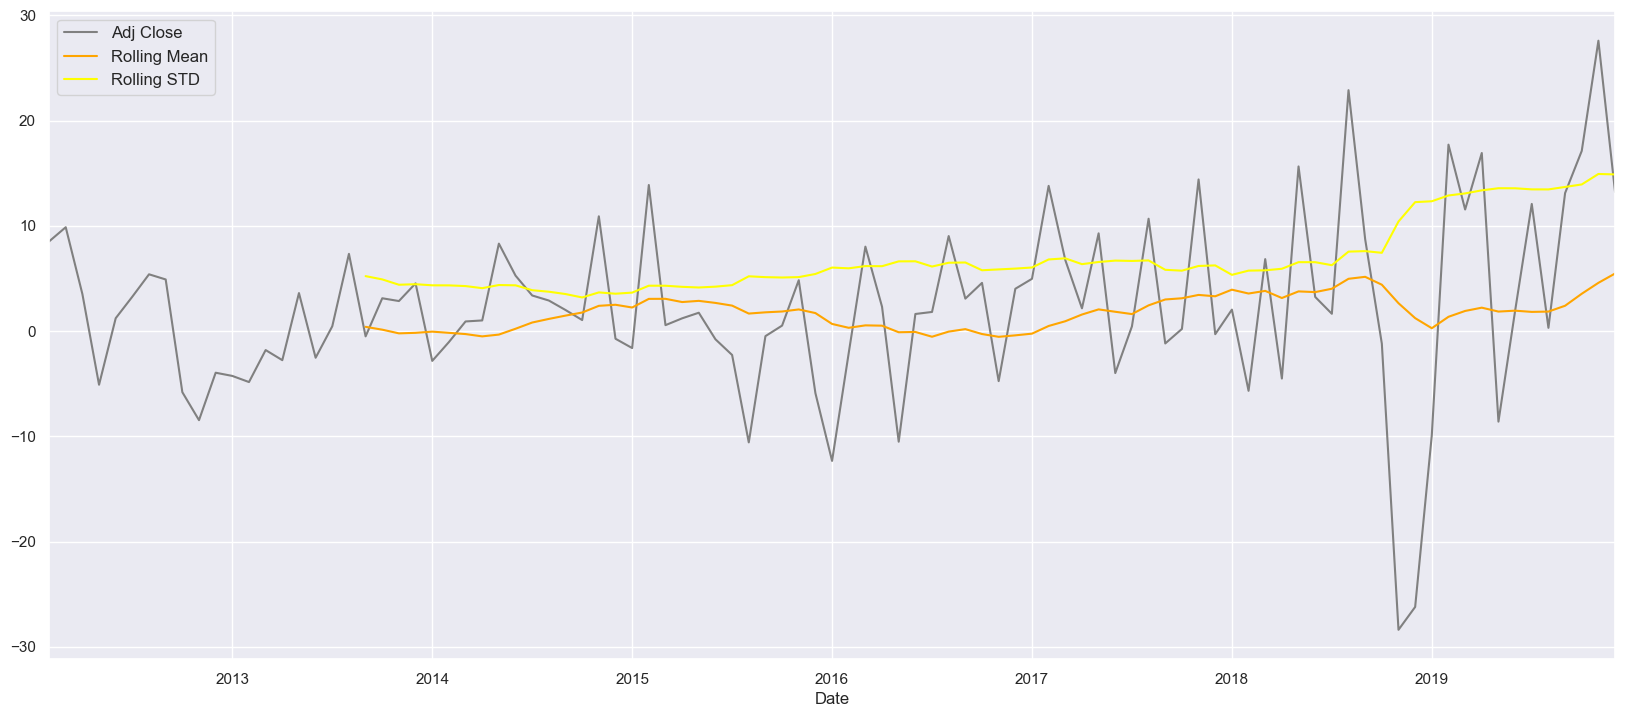

In [49]:

monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})
     

+ Our series is now stationary as its having constant mean and variance

In [50]:

##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.501864
p-value:0.000000
Critical Values:
	1%: -3.502
Reject Null Hypothesos(Ho)-Time Series is Stationary
	5%: -2.893
Reject Null Hypothesos(Ho)-Time Series is Stationary
	10%: -2.583
Reject Null Hypothesos(Ho)-Time Series is Stationary


Text(0.5, 0, 'Lags')

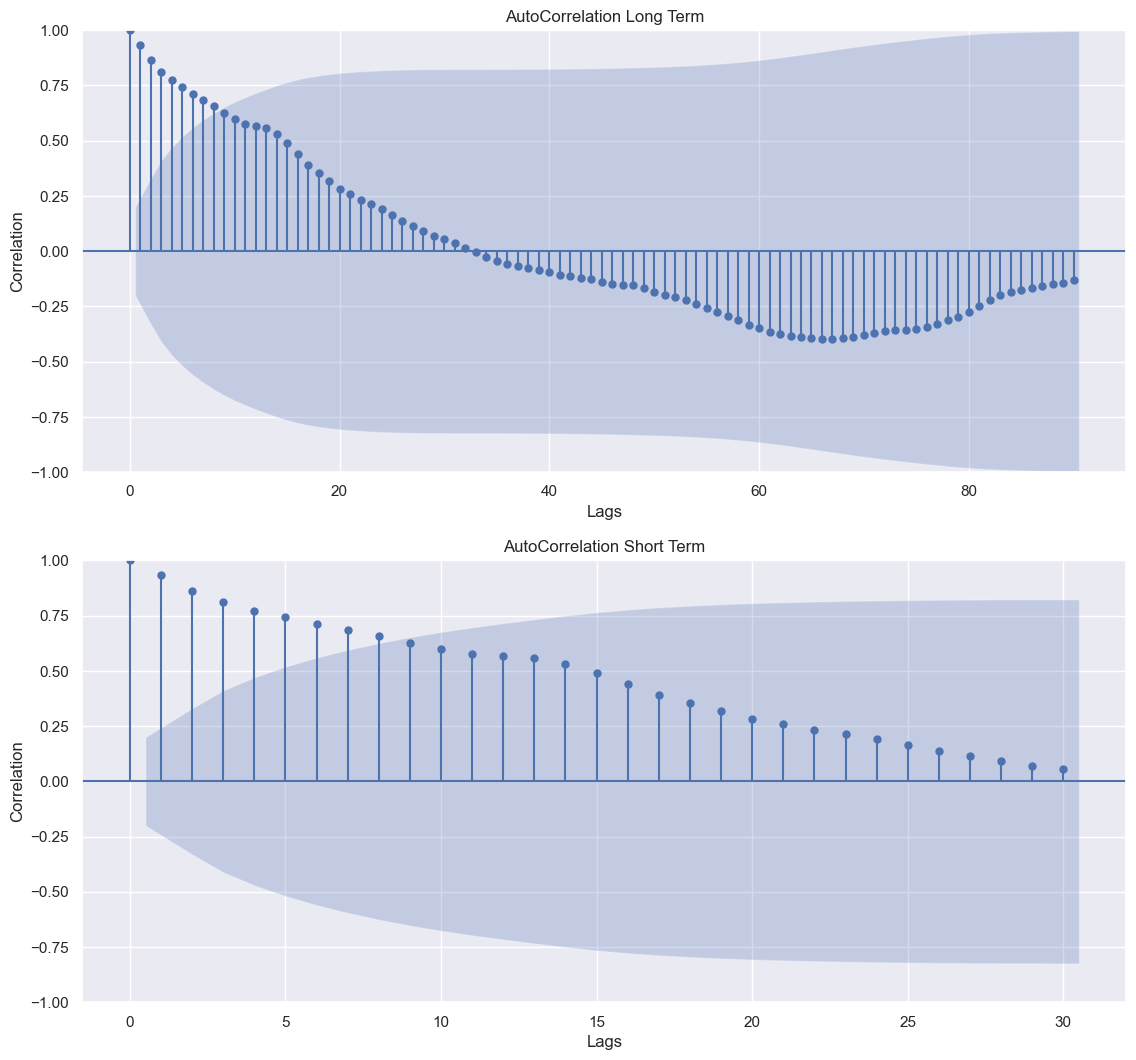

In [51]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

**Interpreting ACF Plot:**
+ Slow decay of correlation values indicates that future values are heavily dependent on lagged values. This shows that series in not random and good for time series modelling.
+ It indicates MA(1) process

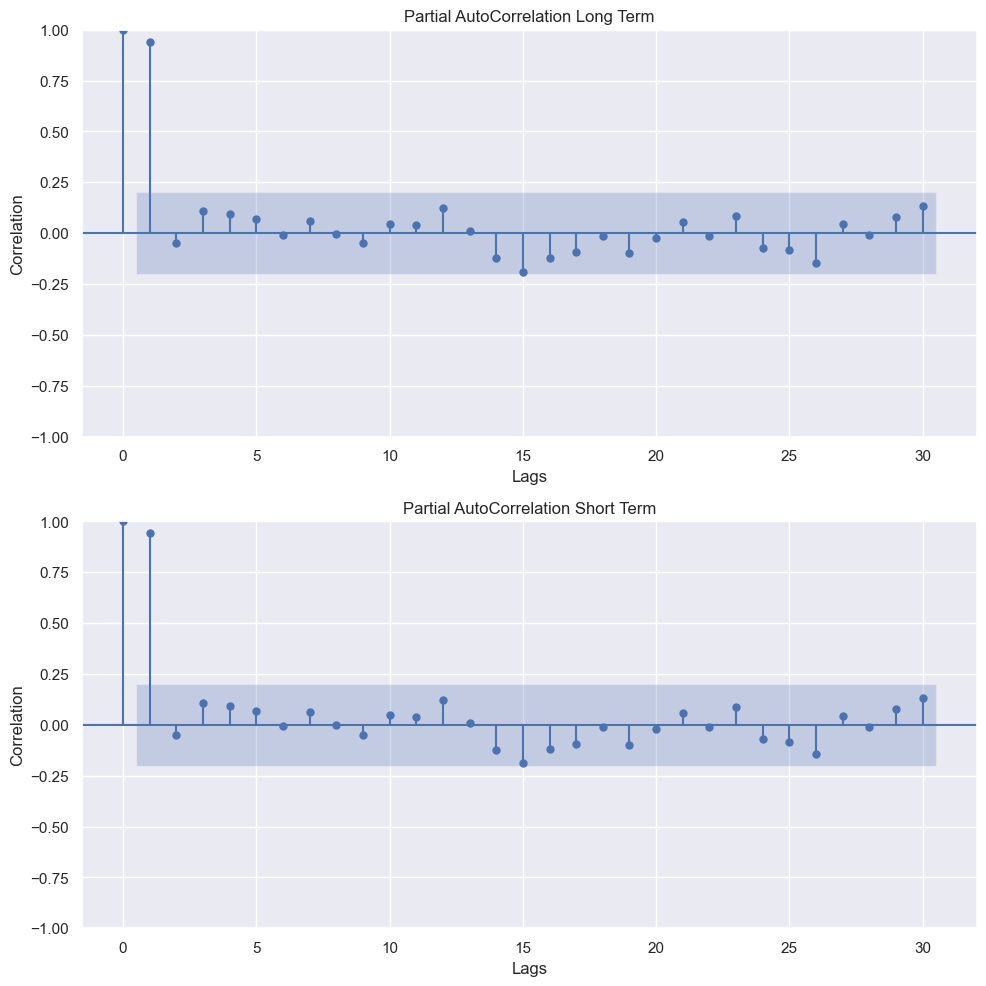

In [52]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

Interpreting PACF Plot :-

*Sudden Decay at Lag-1

*Order of series seems AR(1)

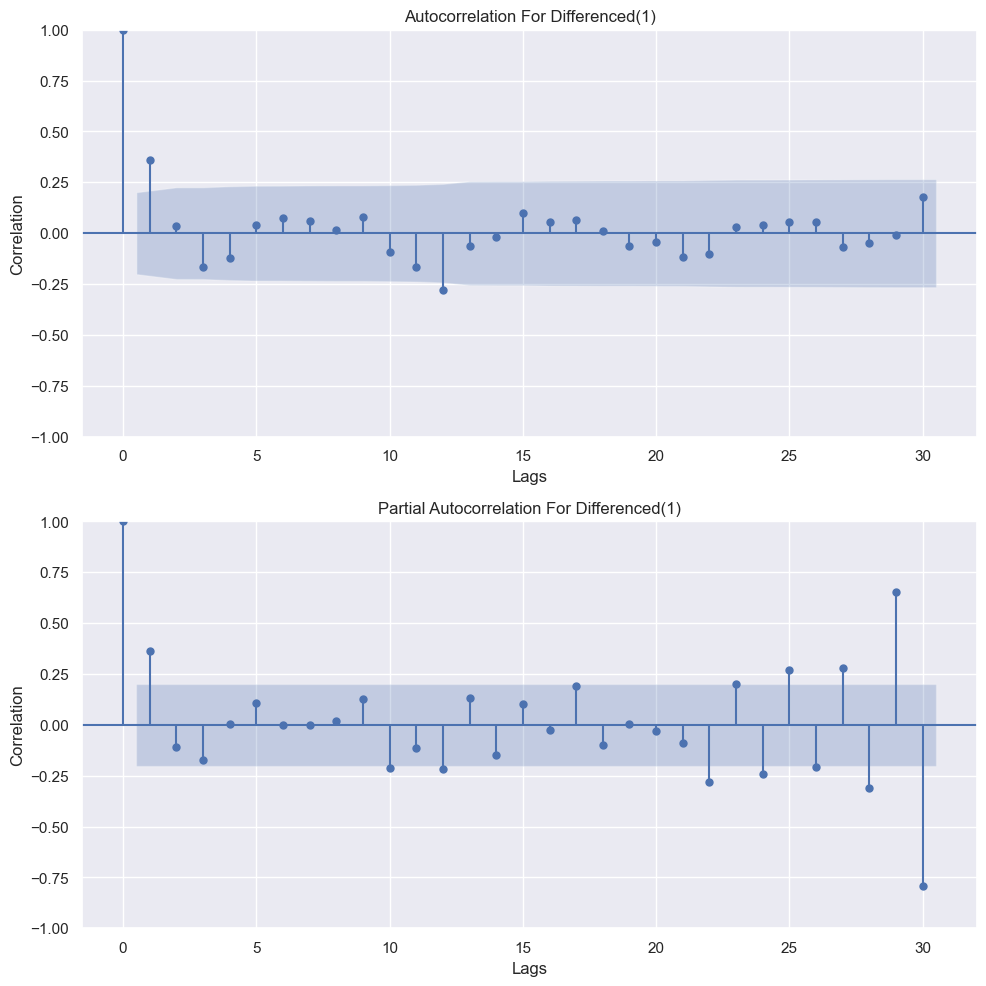

In [53]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

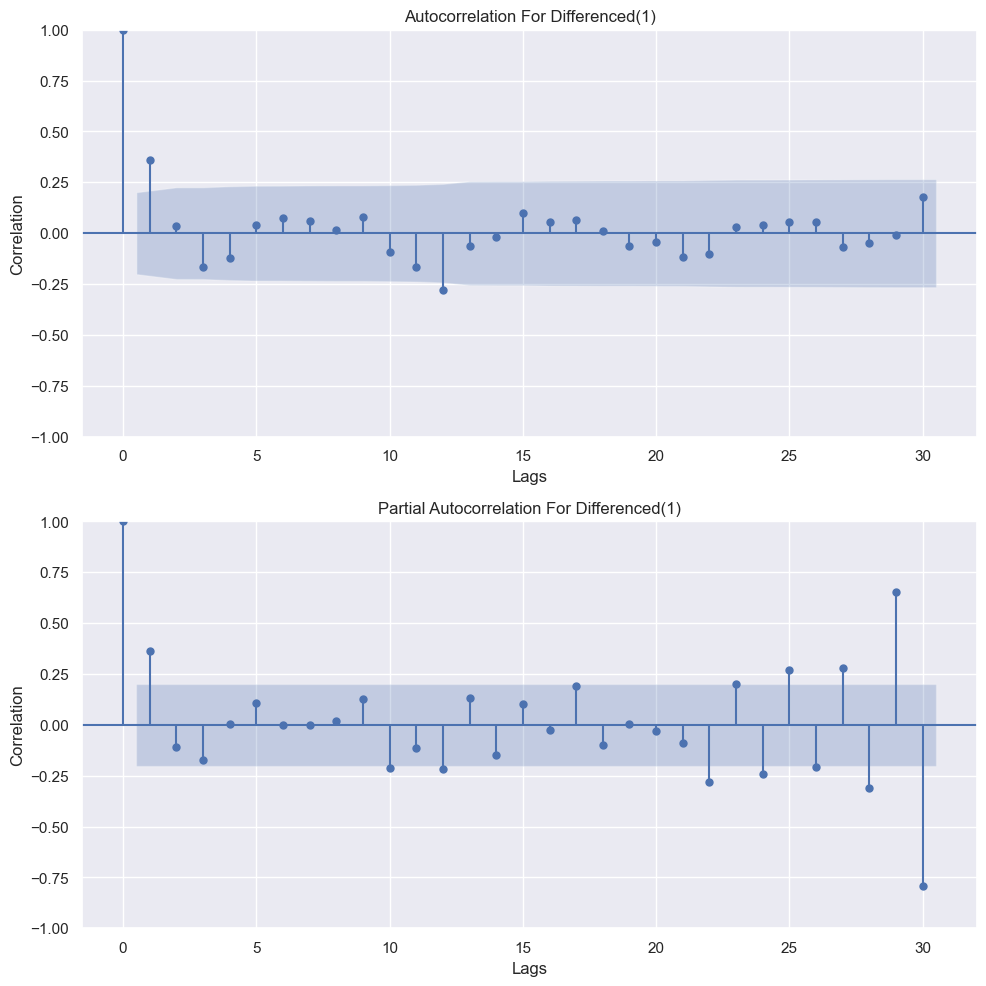

In [54]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

# Modelling Seasonal ARIMA

In [55]:
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'date'], dtype='object')

In [56]:
apple.set_index('date', inplace=True)
apple['year'] = apple.index.year
apple['month'] = apple.index.strftime('%B')
apple['day'] = apple.index.strftime('%A')
apple['quarter'] = apple.index.quarter

In [57]:
apple.drop(["Open",'High','Low','Close','Volume','year','month','day','quarter'], axis = 1, inplace = True)
# df.head()

In [58]:
df1=apple.drop("Adj Close", axis=1)
df1.head()

""
date
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-09


In [59]:
ddf=apple.drop("Adj Close", axis=1)
apple.head()

,Adj Close
date,
2012-01-03,50.7657
2012-01-04,51.0385
2012-01-05,51.6052
2012-01-06,52.1446
2012-01-09,52.0619


In [60]:
split_date = "2018-01-01"
train = apple.loc[apple.index < split_date]
test = apple.loc[apple.index >= split_date]
print("Train data :", train.shape)
print("Test data :",test.shape)

Train data : (1509, 1)
Test data : (502, 1)


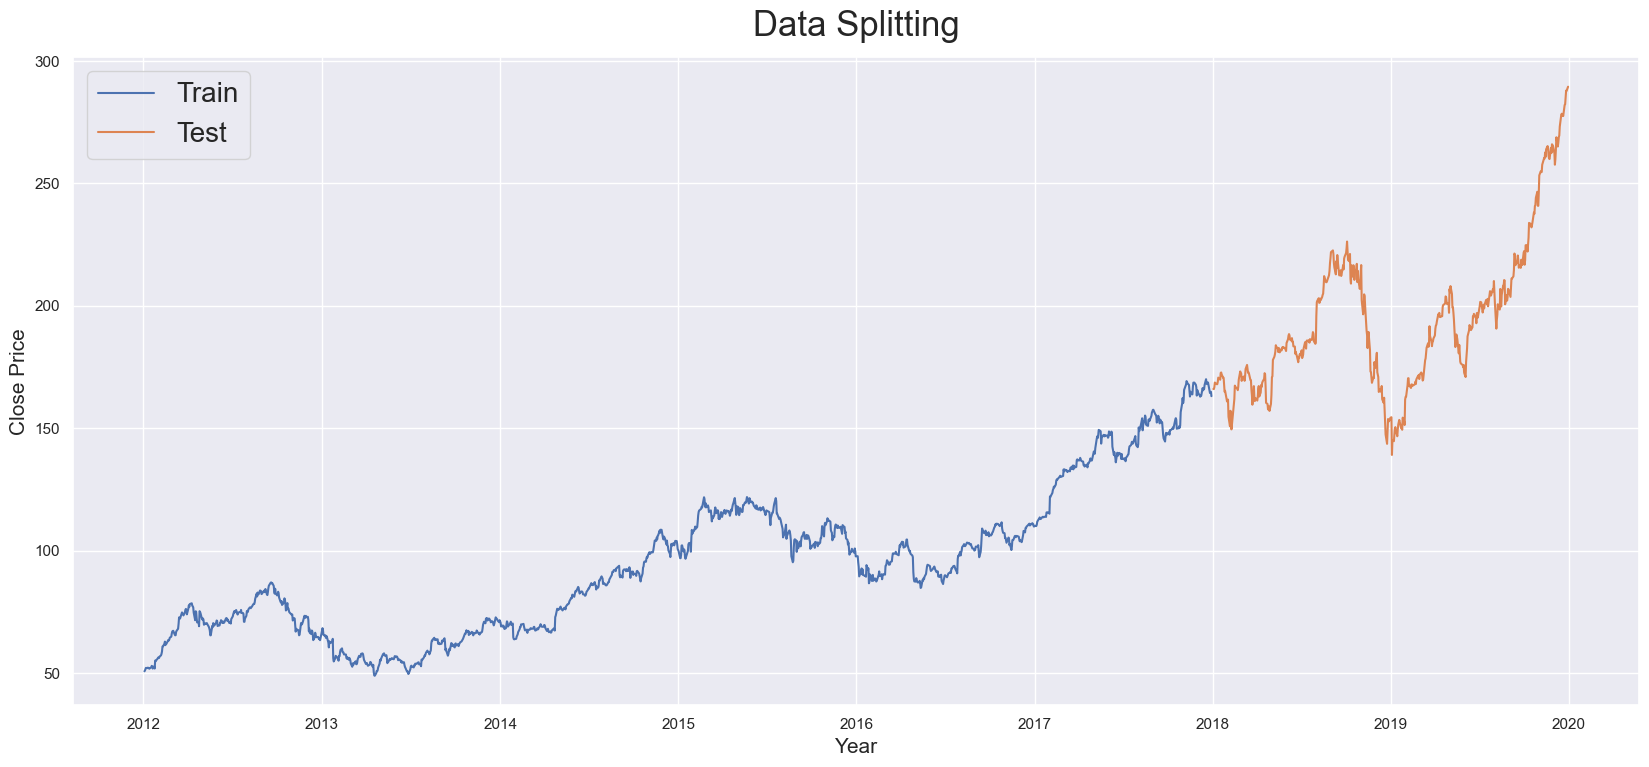

In [61]:
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.title("Data Splitting", size = 25, y = 1.02)
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(fontsize = 20)
plt.show()

In [62]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [63]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5321.528, Time=4.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5324.046, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5325.096, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5325.028, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5326.240, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5327.116, Time=0.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5326.974, Time=1.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5326.530, Time=3.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5326.516, Time=3.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5326.555, Time=0.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5328.181, Time=2.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5328.219, Time=2.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5328.082, Time=4.97 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=2.23 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1509
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2654.764
Date:                Thu, 27 Apr 2023   AIC                           5321.528
Time:                        01:29:45   BIC                           5353.440
Sample:                             0   HQIC                          5333.413
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1068      0.052      2.059      0.039       0.005       0.209
ar.L1          0.5588      0.012     47.082      0.000       0.536       0.582
ar.L2         -0.9873      0.012    -82.769      0.000      -1.011      -0.964
ma.L1         -0.5677      0.015    -36.946      0.000      -0.598      -0.538
ma.L2          0.9799      0.015     63.609      0.000       0.950       1.010
sigma2         1.9795      0.044     45.281      0.000       1.894       2.065
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):               839.63
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['Adj Close'],order = (1,1,1))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1509
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2661.280
Date:                Thu, 27 Apr 2023   AIC                           5328.559
Time:                        01:29:46   BIC                           5344.515
Sample:                             0   HQIC                          5334.502
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2966      0.644     -0.460      0.645      -1.559       0.966
ma.L1          0.3285      0.639      0.514      0.607      -0.925       1.582
sigma2         1.9970      0.043     46.178      0.000       1.912       2.082
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               864.60
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+501,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
date,
2018-01-02,163.076722
2018-01-03,163.093565
2018-01-04,163.088568
2018-01-05,163.090050
2018-01-08,163.089611
...,...
2019-12-23,163.089711
2019-12-24,163.089711
2019-12-26,163.089711


In [66]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = apple.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
date                      
2018-01-02      163.076722
2018-01-03      163.093565
2018-01-04      163.088568
2018-01-05      163.090050
2018-01-08      163.089611
...                    ...
2019-12-23      163.089711
2019-12-24      163.089711
2019-12-26      163.089711
2019-12-27      163.089711
2019-12-30      163.089711

[502 rows x 1 columns]


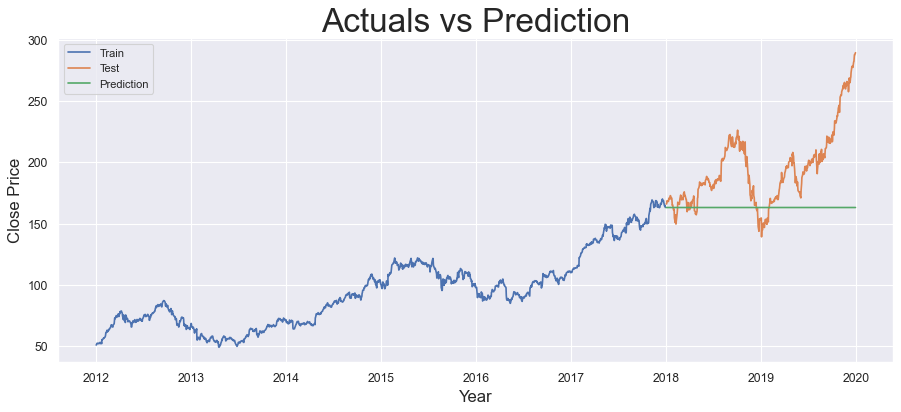

In [67]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

Here, we got straight line because we have seasonal patterns in our data. So, we have seen ARIMA Model is not predicting well. Hence we can't use ARIMA model for future prediction

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [69]:
mse = mean_squared_error(test_pred['predicted_mean'],test['Adj Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test['Adj Close'])
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test['Adj Close'])
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1906.0509083747481
Root Mean Squared Error (RMSE) =  43.66
Mean Absolute Error (MAE)  =  33.26599697237231
Mean Absolute Percentage Error (MAPE)  =  0.2039736109880785


# SARIMA

*An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA - Seasonal Autoregressive Integrated Moving Average.

*There are four seasonal elements that are not part of ARIMA that must be configured; they are:

*P: Seasonal autoregressive order.

*D: Seasonal difference order.
    
*Q: Seasonal moving average order.
    
*m: The number of time steps for a single seasonal period.

In [70]:
import itertools
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [71]:
model_SA = sm.tsa.SARIMAX(train['Adj Close'], order=(0,1,2), seasonal_order=(1,1,0,66))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Adj Close   No. Observations:                 1509
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 66)   Log Likelihood               -2887.232
Date:                             Thu, 27 Apr 2023   AIC                           5782.464
Time:                                     01:30:05   BIC                           5803.559
Sample:                                          0   HQIC                          5790.338
                                            - 1509                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0056      0.023      0.246      0.806      -0.039       0.050
ma.L2         -0.0316      0.025     -1.261      0.207      -0.081       0.018
ar.S.L66      -0.4946      0.018    -27.985      0.000      -0.529      -0.460
sigma2         3.1701      0.075     42.140      0.000       3.023       3.317
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               546.09
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+501,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
date,
2018-01-02,163.936787
2018-01-03,163.349166
2018-01-04,162.767840
2018-01-05,163.611199
2018-01-08,162.918955
...,...
2019-12-23,270.976624
2019-12-24,272.836078
2019-12-26,272.016401


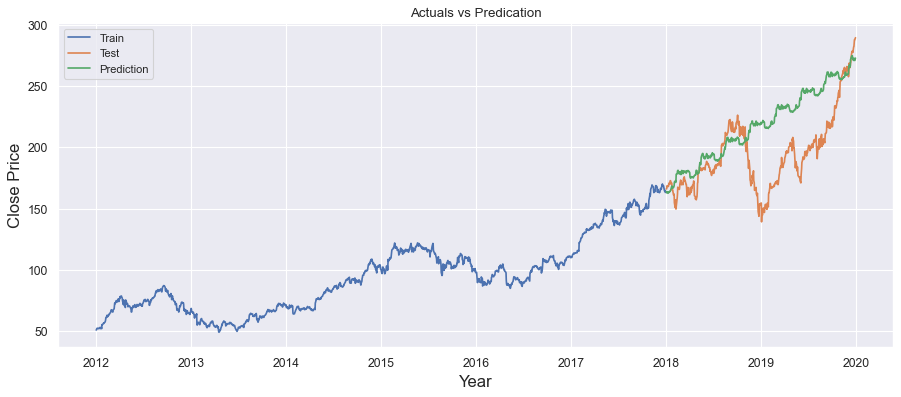

In [73]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Adj Close'], label = 'Train')
plt.plot(test['Adj Close'], label = 'Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Predication');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

**Here, Using SARIMA model we have seen that predication is showing an upward trend.

**So, It's a good model and predicting well.

**Hence We can use this model for future Prediction.

In [74]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['Adj Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test['Adj Close'])
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test['Adj Close'])
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1179.7834995642113
Root Mean Squared Error (RMSE) =  34.35
Mean Absolute Error (MAE)  =  26.918980415557385
Mean Absolute Percentage Error (MAPE)  =  0.11915430369736671


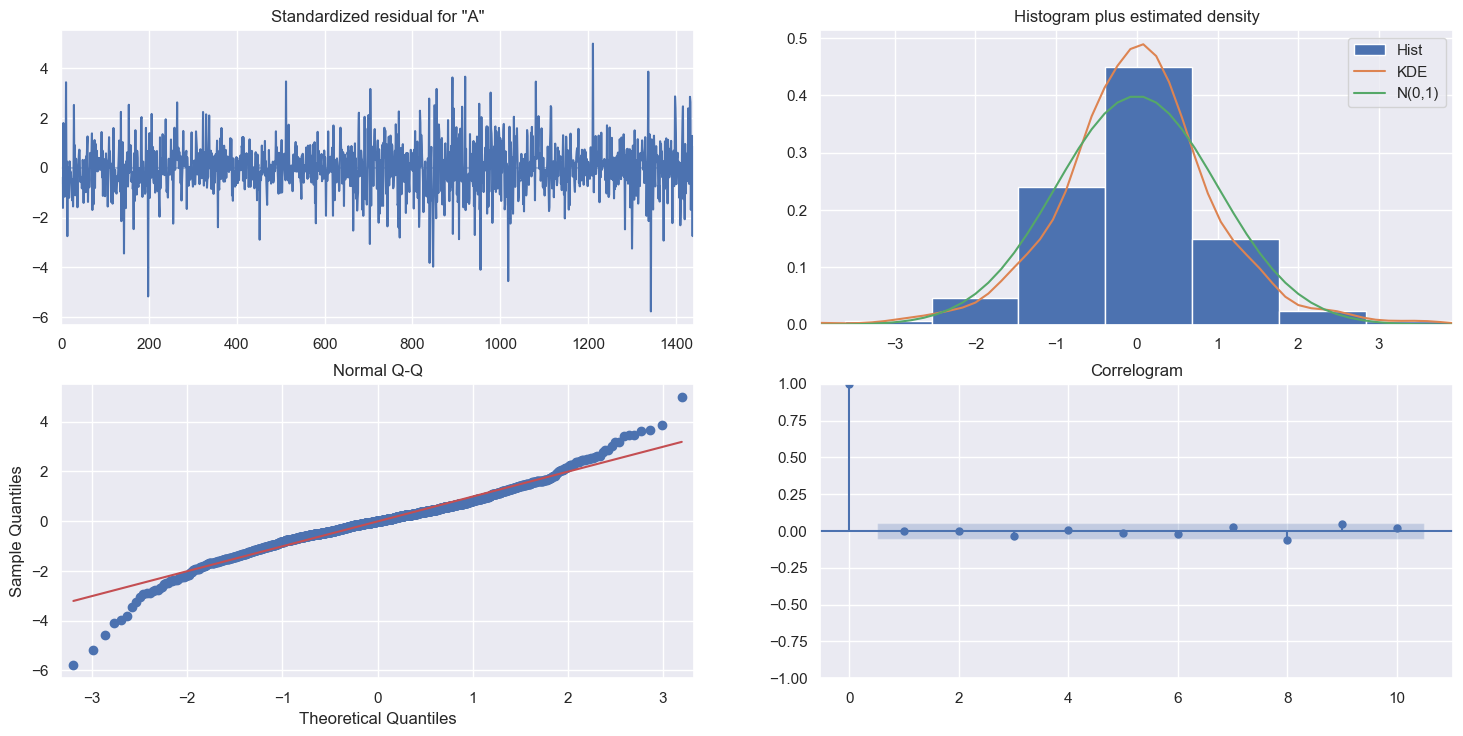

In [75]:
result_SA1=result_SA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [82]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(result_SA.resid,lags=[1],return_df=True)

,lb_stat,lb_pvalue
1,0.020272,0.88678


# Forcast for next 30 days

In [76]:
forecast_SA = result_SA.predict(len(apple), len(apple)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2019-12-30', end = '2020-01-30')
forecast_SA.index=index_future_dates
print(forecast_SA)

2019-12-30    273.939574
2019-12-31    274.760067
2020-01-01    274.254841
2020-01-02    273.370895
2020-01-03    271.238304
2020-01-04    273.279514
2020-01-05    273.218699
2020-01-06    272.550435
2020-01-07    272.652947
2020-01-08    272.261733
2020-01-09    271.838114
2020-01-10    271.816505
2020-01-11    273.742768
2020-01-12    272.283067
2020-01-13    273.560395
2020-01-14    273.325323
2020-01-15    274.072762
2020-01-16    275.221834
2020-01-17    274.513939
2020-01-18    274.007879
2020-01-19    274.453284
2020-01-20    273.610802
2020-01-21    269.893259
2020-01-22    269.437556
2020-01-23    269.323324
2020-01-24    268.948326
2020-01-25    269.831978
2020-01-26    269.137227
2020-01-27    269.013639
2020-01-28    269.480731
2020-01-29    269.228951
2020-01-30    268.694724
Freq: D, Name: predicted_mean, dtype: float64


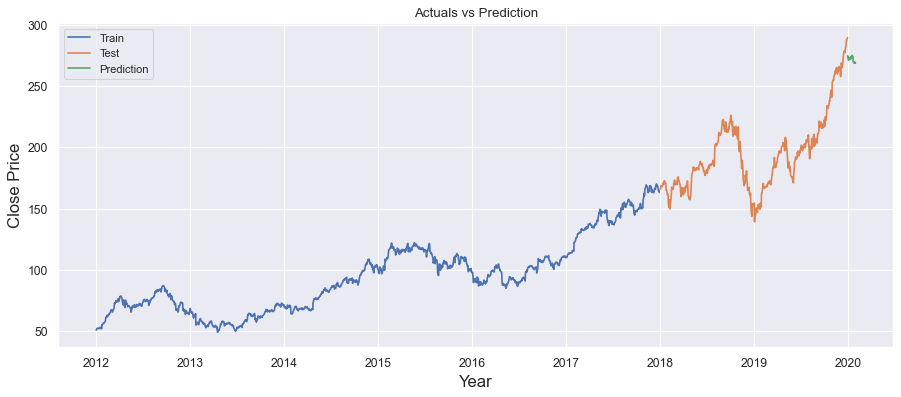

In [77]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Adj Close'], label = 'Train')
plt.plot(test['Adj Close'], label = 'Test')
plt.plot(forecast_SA, label = 'Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

Here We plotted prediction plot

# Forecasting 6 years

In [78]:
forecast_SA = result_SA.predict(len(monthly_diff), len(monthly_diff)+1858, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2019-12-30', end = '2025-01-30')
forecast_SA.index=index_future_dates
print(forecast_SA)

2019-12-30     64.115157
2019-12-31     69.904860
2020-01-01     68.575948
2020-01-02     72.052962
2020-01-03     69.492954
                 ...    
2025-01-26    259.951269
2025-01-27    259.898172
2025-01-28    259.235741
2025-01-29    259.341042
2025-01-30    258.952176
Freq: D, Name: predicted_mean, Length: 1859, dtype: float64


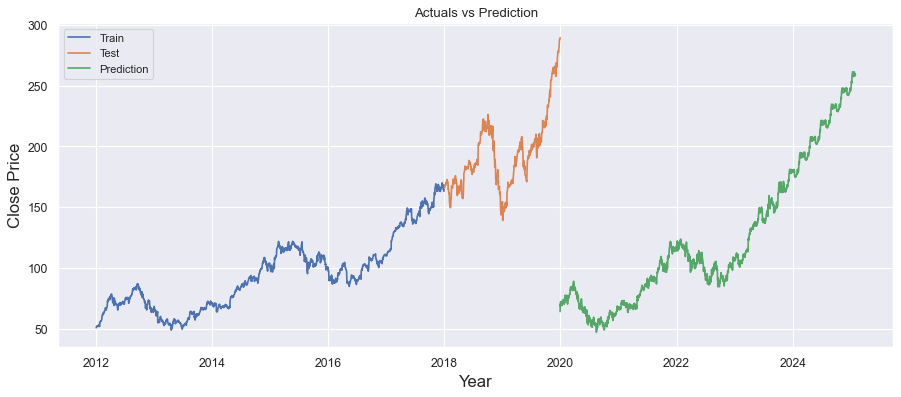

In [79]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Adj Close'], label = 'Train')
plt.plot(test['Adj Close'], label = 'Test')
plt.plot(forecast_SA, label = 'Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()